Import Libiraries & Load Data


In [4]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data= load_breast_cancer(as_frame=True)
cancer_df=data.frame
cancer_df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Exploratory Data Analysis (EDA) & Feature Engineering


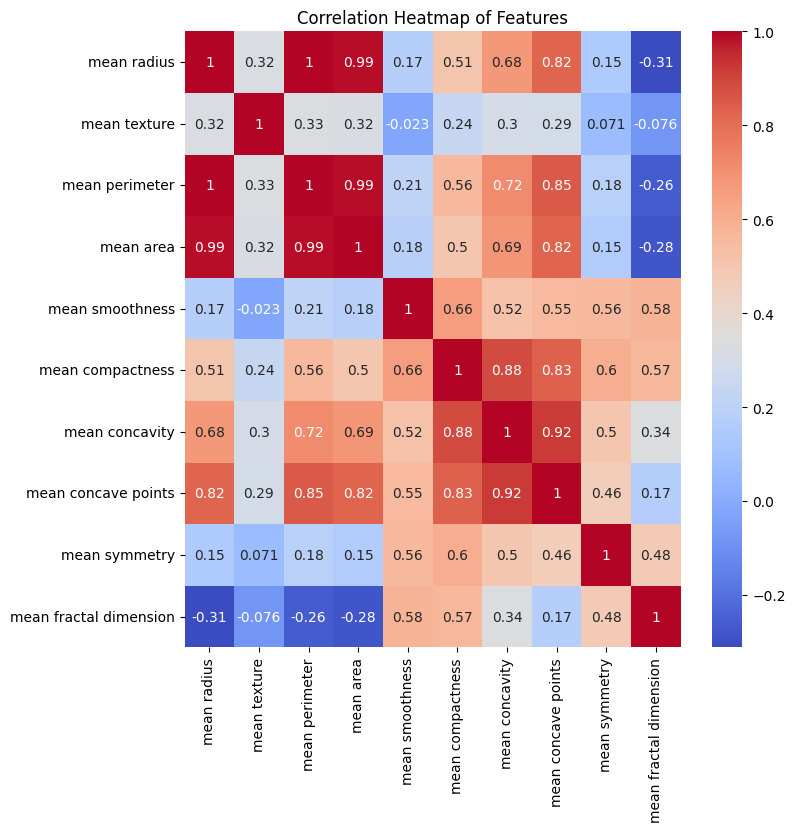

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

#(EDA)
plt.figure(figsize=(8, 8))
sns.heatmap(cancer_df.iloc[:, :10].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Features")
plt.show()

In [ ]:
#Featuring
columns_to_drop = ['mean perimeter', 'mean area', 'worst perimeter', 'worst area']

Data Split & Scaling

In [12]:
X= cancer_df.drop(columns=columns_to_drop, axis=1)
Y=cancer_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Scaling
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

Modeling 

In [13]:
model=LogisticRegression()
model.fit(X_train_scaled,y_train)
Y_predict=model.predict(X_test_scaled)
acc = accuracy_score(y_test, Y_predict)
print(f"Accuracy: {acc * 100:.2f}%")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test,Y_predict ))

print("\nClassification Report:")
print(classification_report(y_test, Y_predict))

Accuracy: 100.00%

Confusion Matrix:
[[43  0]
 [ 0 71]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        71

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



In [16]:
# Using Cross-Validation to ensure the 100% accuracy is real and the model is not overfitting.
from sklearn.model_selection import cross_val_score

X_scaled = scaler.fit_transform(X)

cv_model = LogisticRegression(max_iter=1000)
scores = cross_val_score(cv_model, X_scaled, Y, cv=5)

print("Scores in 5 different tests:", scores)
print(f"Real Average Accuracy: {scores.mean() * 100:.2f}%")

Scores in 5 different tests: [1. 1. 1. 1. 1.]
Real Average Accuracy: 100.00%
